## 4. Local Sequence Alignment (Done)


## 💡 What's the Goal?
We want to find **local alignments** — the best matching **parts** of two DNA sequences.

We'll use the **Smith-Waterman algorithm**, which is like Needleman-Wunsch but focuses on **matching subsequences**.

## 🎯 What’s Different from Global Alignment?
- **Global alignment** matches from start to end (Needleman-Wunsch).
- **Local alignment** finds the **best part** of the sequences that match (Smith-Waterman).

## Scoring System
We give:
- Match = **+2**
- Mismatch = **-1**
- Gap = **-2**
- If score < 0, reset it to 0 (to find local regions)

In [1]:
# STEP 1: SETUP

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Local alignment scoring
match = 2
mismatch = -1
gap = -2

def score(a, b):
    return match if a == b else mismatch

In [2]:
# STEP 2: ALGORITHM

def smith_waterman(seq1, seq2):
    m, n = len(seq1), len(seq2)
    dp = np.zeros((m+1, n+1), dtype=int)
    max_score = 0
    max_pos = (0, 0)

    for i in range(1, m+1):
        for j in range(1, n+1):
            match_score = dp[i-1][j-1] + score(seq1[i-1], seq2[j-1])
            delete = dp[i-1][j] + gap
            insert = dp[i][j-1] + gap
            dp[i][j] = max(0, match_score, delete, insert)
            if dp[i][j] > max_score:
                max_score = dp[i][j]
                max_pos = (i, j)

    return dp, max_pos

In [3]:
# STEP 3: VISUALIZE

def show_matrix_with_headers(dp, seq1, seq2):
    seq1 = '-' + seq1
    seq2 = '-' + seq2
    df = pd.DataFrame(dp, index=[c for c in seq1], columns=[c for c in seq2])
    plt.figure(figsize=(10, 6))
    ax = sns.heatmap(df, annot=True, fmt='d', cmap="YlOrRd", cbar=False)
    plt.title("Local Alignment Score Matrix\n\n(Sequence 2 on Top)")
    ax.set_xlabel("")
    ax.set_ylabel("Sequence 1 (Side)")
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.show()

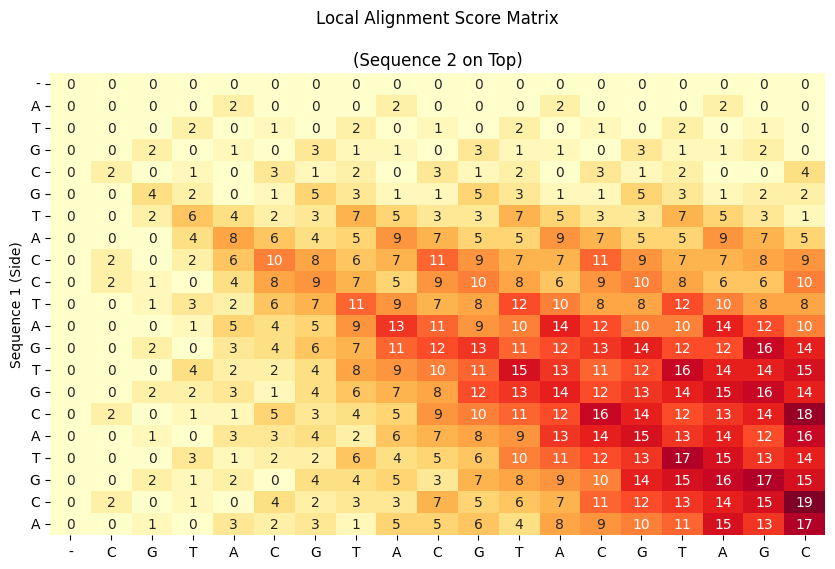

In [4]:
# Jupyter Notebook Cell 7: Try it Out!
seq1 = "ATGCGTACCTAGTGCATGCA"
seq2 = "CGTACGTACGTACGTAGC"

# Compute matrix and show it
dp_matrix, max_pos = smith_waterman(seq1, seq2)
show_matrix_with_headers(dp_matrix, seq1, seq2)



## 🔄 Traceback in Local Alignment
In local alignment, we **start the traceback from the highest score** in the matrix — not the bottom-right!

We then trace back **until we hit a cell with score 0**, which means the best matching segment has ended.

This gives us the best **local match** between the two sequences.


In [5]:
def traceback_local(dp, seq1, seq2, start):
    aligned1 = ""
    aligned2 = ""
    i, j = start

    while dp[i][j] != 0:
        current = dp[i][j]
        if i > 0 and j > 0 and current == dp[i-1][j-1] + score(seq1[i-1], seq2[j-1]):
            aligned1 = seq1[i-1] + aligned1
            aligned2 = seq2[j-1] + aligned2
            i -= 1
            j -= 1
        elif i > 0 and current == dp[i-1][j] + gap:
            aligned1 = seq1[i-1] + aligned1
            aligned2 = '-' + aligned2
            i -= 1
        elif j > 0 and current == dp[i][j-1] + gap:
            aligned1 = '-' + aligned1
            aligned2 = seq2[j-1] + aligned2
            j -= 1
        else:
            break
    return aligned1, aligned2


In [6]:
aligned1, aligned2 = traceback_local(dp_matrix, seq1, seq2, max_pos)
print("🔬 Best Local Alignment:\n")
print(aligned1)
print(aligned2)


🔬 Best Local Alignment:

CGTACCTA-GTGCAT-GC
CGTACGTACGTACGTAGC


## ✅ What Did We Learn?
- The **Smith-Waterman algorithm** helps us find **matching subsequences** inside larger sequences.
- We built a matrix of scores and found the **highest scoring region**.
- We used **traceback** to extract the best local alignment.

Local alignment is used to detect **similar regions**, like in genes, even if the whole sequences are not similar!
